### Escola Politécnica da Universidade de São Paulo

# <span style="color:blue">PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões</span>

## Aplicação do kNN na base adult

Autor: Lucas Penna Saraiva. Data: 01/09/2018;


### Importar o Pandas

What’s cool about Pandas is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called data frame that looks very similar to table in a statistical software.

In [2]:
import pandas as pd

Vamos carregar, agora, a Base Adult usando o método read_csv do Pandas;

> Definimos os nomes das colunas (labels) passando uma lista para o argumento 'names'.
>
> Definimos os separadores de dados como virgulas e pular linhas.
> 
> Definimos os missing values como "?".


In [3]:
adult = pd.read_csv("adult.train.csv",
        names=[
        "Age", "Workclass","fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        engine='python',
        na_values="?")

Vamos investigar as dimensões do nosso dataset:

In [4]:
adult.shape

(32560, 15)

> Nosso dataset tem: 
>
> Linhas: 32561.
>
> Colunas: 15.

#### O Método .head() nos permite dar uma _primeira olhada_ no nosso dataset!

In [5]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


Podemos contar, também, quanto de cada elemento há em uma coluna em específico. Para isso, podemos filtrar o dataframe a partir de suas colunas e aplicar o método **value_counts()**:

In [6]:
adult["Country"].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Agora, devemos importar a matplotlib para gerarmos gráficos.

In [7]:
import matplotlib.pyplot as plt

# Formatação mais bonita para os notebooks
%matplotlib inline 
    

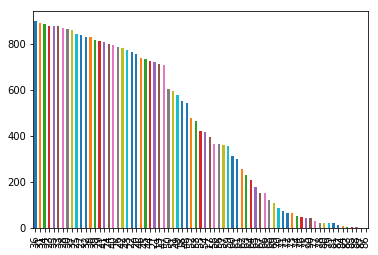

In [8]:
adult["Age"].value_counts().plot(kind='bar')

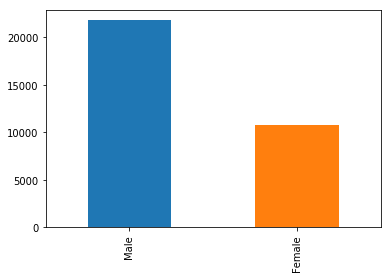

In [9]:
adult["Sex"].value_counts().plot(kind='bar')

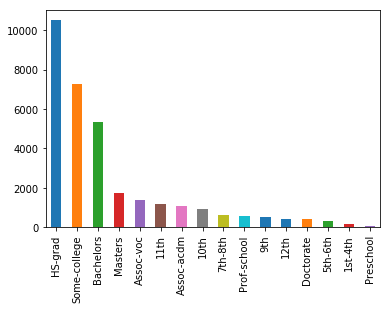

In [10]:
adult["Education"].value_counts().plot(kind="bar")


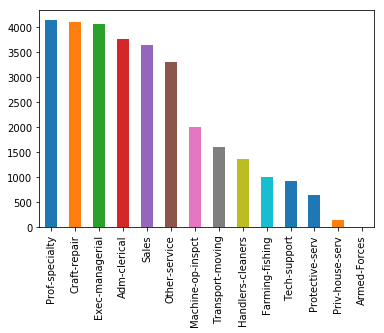

In [11]:
adult["Occupation"].value_counts().plot(kind="bar")



#### Base de Testes: 

In [12]:
# Faremos o mesmo com o nosso data set de treino! Retiraremos suas linhas com missing value...

testAdult = pd.read_csv('adult.test.csv', names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country"],
        engine='python', index_col=0,
        na_values="?")



## Chegou a hora dos testes!

### 1. Primeiro teste: seleção dos atributos numéricos, com múltiplas variações do kNN

Para isso, primeiramente, armazenaremos em Xadult os atributos numéricos da Base Adult completa. Em Yadult, armazenaremos a variável aleatória alvo. Executaremos o mesmo procedimento para a base de treino sem missing data **nTestAdult**, criada acima.

#### 1.1 Separação dos dados:

In [13]:
# Separando os atributos da base de treino

Xadult = adult[["Age","Education-Num","Capital Gain", "Capital Loss", "Hours per week"]]

Yadult = adult.Target

In [14]:
# Separando os atributos da base teste

XtestAdult = testAdult[["Age","Education-Num", "Capital Gain", "Capital Loss", "Hours per week"]]



#### 1.2 Aplicação da Validação Cruzada e Treinamento do modelo:

**Precisamos importar a Sklearn**

*"Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy."


In [15]:
import sklearn

In [16]:
# Importaremos o módulo que contém o classificador K-Nearest-Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Criamos o objeto knn, da classe KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)

In [17]:
# Importaremos o módulo necessário para fazer a validação cruzada

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, Xadult, Yadult, cv=10) #Exemplo de validação cruzada: K-fold (visto em aula)

print(scores)

knn.fit(Xadult, Yadult)

Ypred = knn.predict(XtestAdult)

Ypred

[0.83512435 0.8277027  0.83998771 0.82585995 0.83445946 0.84889435
 0.82862408 0.83384521 0.83538084 0.84608295]


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [18]:
df = pd.DataFrame(Ypred)

df.to_csv('predicoes.csv')